In [56]:
import pandas as pd
df = pd.read_csv('coins_data.xlsx - Sheet1.csv')
df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum


In [57]:
cols = df[['MarketCap', 'Volume']]

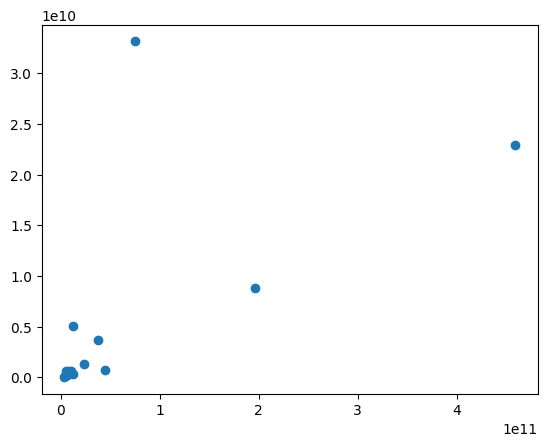

In [58]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# pairwise distances between data points
distances = pdist(cols, metric='euclidean')
plt.scatter(df['MarketCap'], df['Volume'])

In [59]:
# hierarchial clustering
linkage_matrix = linkage(distances, method='average')

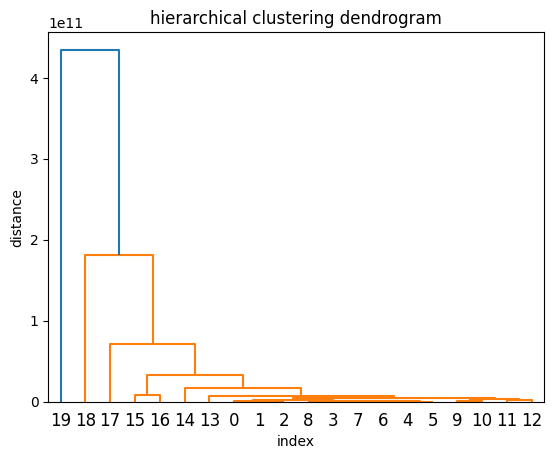

In [60]:
# dendrogram
dendrogram(linkage_matrix, labels=df.index)
plt.xlabel('index')
plt.ylabel('distance')
plt.title('hierarchical clustering dendrogram')
plt.show()

number of clusters: 2
cluster labels: [0 1]


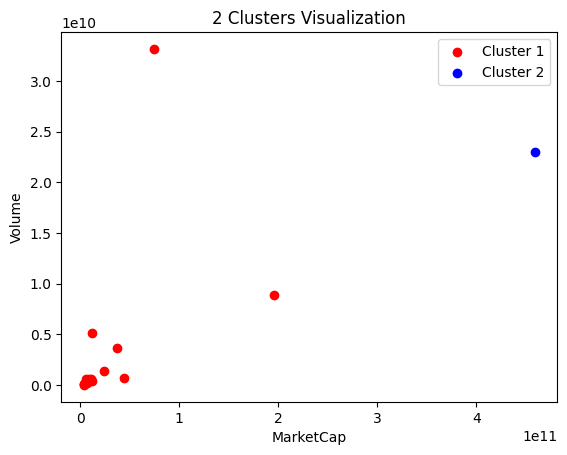

In [61]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 2
clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_assignments = clustering.fit_predict(cols)

df['Cluster'] = cluster_assignments

unique_clusters = np.unique(cluster_assignments)

print(f"number of clusters: {num_clusters}")
print("cluster labels:", unique_clusters)

# separate data into two clusters
cluster1_data = df[df['Cluster'] == 0]
cluster2_data = df[df['Cluster'] == 1]

# visualization of clusters
plt.scatter(df['MarketCap'][df['Cluster'] == 0], df['Volume'][df['Cluster'] == 0], c='red', label='Cluster 1')
plt.scatter(df['MarketCap'][df['Cluster'] == 1], df['Volume'][df['Cluster'] == 1], c='blue', label='Cluster 2')

# Add labels and legend
plt.xlabel('MarketCap')
plt.ylabel('Volume')
plt.title('2 Clusters Visualization')
plt.legend()
plt.show()


Task 2

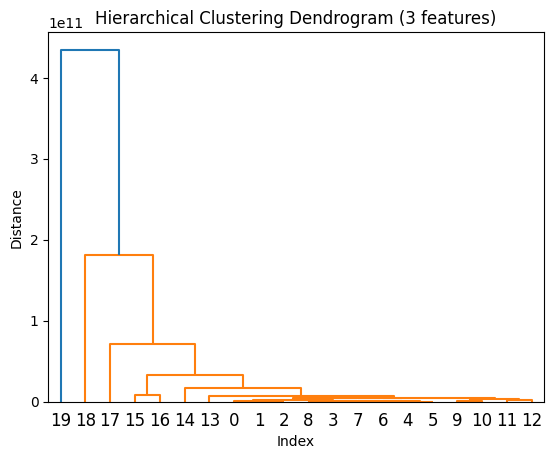

Number of clusters: 2
Cluster labels: [1 2]


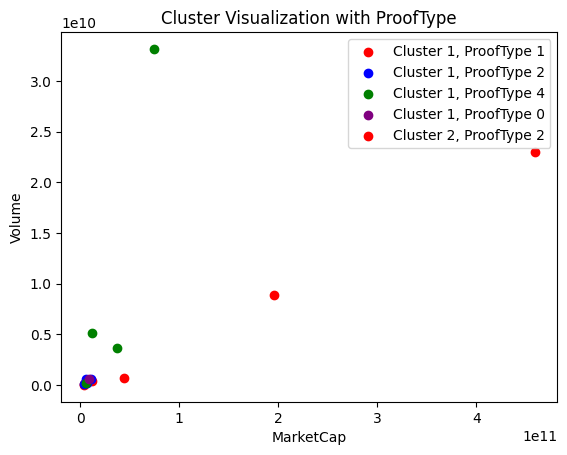

In [62]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
df['ProofType'] = label_encoder.fit_transform(df['ProofType'])

features = df[['MarketCap', 'Volume', 'ProofType']].values

# pairwise distances
distances = pdist(features, metric='euclidean')
square_distances = squareform(distances)
condensed_distances = squareform(square_distances)
linkage_matrix = linkage(condensed_distances, method='average')

dendrogram(linkage_matrix, labels=df.index)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram (3 features)')
plt.show()

num_clusters = 2

# cut the dendrogram horizontally to create clusters
cluster_assignments = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

df['Cluster'] = cluster_assignments


unique_clusters = df['Cluster'].unique()
print("Number of clusters:", len(unique_clusters))
print("Cluster labels:", unique_clusters)

# visualize the clusters, distinguishing 'ProofType' using colors
colors = ['red', 'blue', 'green', 'purple'] 

for cluster_label in range(1, num_clusters + 1):
    cluster_data = df[df['Cluster'] == cluster_label]
    for proof_type, color in zip(cluster_data['ProofType'].unique(), colors):
        proof_type_data = cluster_data[cluster_data['ProofType'] == proof_type]
        plt.scatter(proof_type_data['MarketCap'], proof_type_data['Volume'], c=color, label=f'Cluster {cluster_label}, ProofType {proof_type}')

plt.xlabel('MarketCap')
plt.ylabel('Volume')
plt.title('Cluster Visualization with ProofType')
plt.legend()
plt.show()


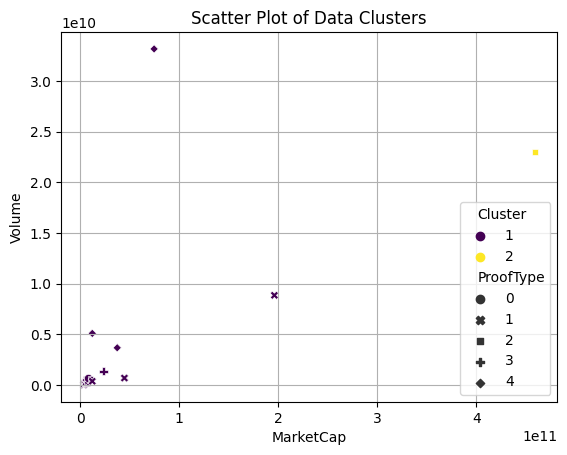

In [63]:
import seaborn as sns
sns.scatterplot(data=df, x='MarketCap', y='Volume', hue='Cluster', style='ProofType', palette='viridis')
plt.xlabel('MarketCap')
plt.ylabel('Volume')
plt.title('Scatter Plot of Data Clusters')
plt.grid(True)
plt.show()


3D plot of clusters

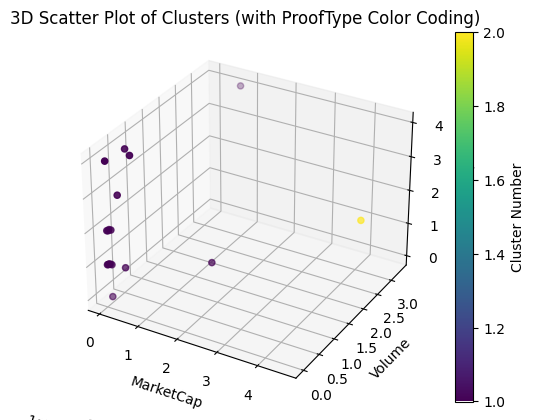

In [64]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Encode the 'ProofType' column to numerical values
label_encoder = LabelEncoder()
df['ProofType_encoded'] = label_encoder.fit_transform(df['ProofType'])

scatter = ax.scatter(df['MarketCap'], df['Volume'], df['ProofType_encoded'], c=df['Cluster'], cmap='viridis')

ax.set_xlabel('MarketCap')
ax.set_ylabel('Volume')
ax.set_zlabel('ProofType')
ax.set_title('3D Scatter Plot of Clusters (with ProofType Color Coding)')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster Number')

plt.show()


Task 3

In [65]:
df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network,Cluster,ProofType_encoded
0,LEO,1.823284e+06,3586504072,"985,239,504",1,Ethereum,1,1
1,UNI,9.918768e+07,3992451215,"1,000,000,000",1,Ethereum,1,1
2,WBTC,1.415410e+08,4237575489,"163,106",2,Ethereum,1,2
3,AVAX,2.197065e+08,4901630273,"431,804,080",1,Avalanche,1,1
4,DAI,2.177113e+08,5513660644,"5,347,888,596",4,Ethereum,1,4


In [66]:
df_ = pd.read_csv("coins_data.xlsx - Sheet2.csv")
df_['TotalSupply'] = df_['TotalSupply'].str.replace(',', '').astype(float)
numeric_features = ['Volume', 'MarketCap', 'TotalSupply']
categorical_features = ['Symbol', 'ProofType', 'Network']

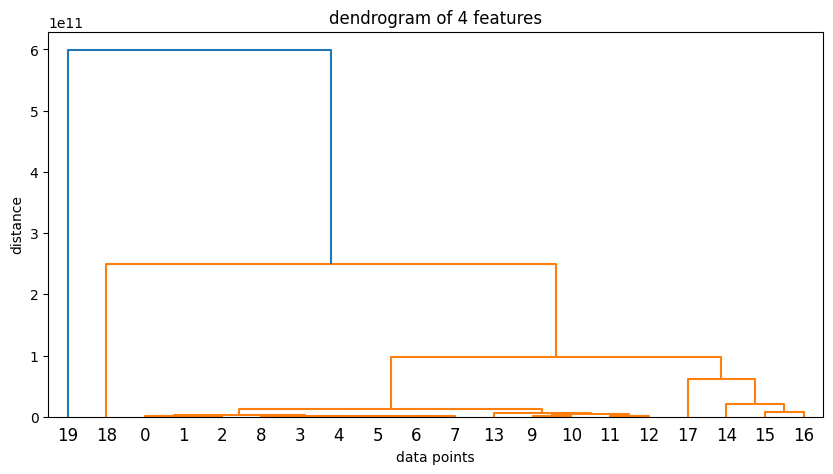

In [67]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for feature in categorical_features:
        label_encoder = LabelEncoder()
        df_[feature] = label_encoder.fit_transform(df_[feature])
        label_encoders[feature] = label_encoder

selected_features = ['Volume', 'MarketCap', 'ProofType', 'Network']

# subset the data based on selected features
subset_data = df_[selected_features]

# hierarchical clustering
linkage_matrix = linkage(subset_data, method='ward', metric='euclidean')

# plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=df_.index, orientation='top')
plt.title('dendrogram of 4 features')
plt.xlabel('data points')
plt.ylabel('distance')
plt.show()


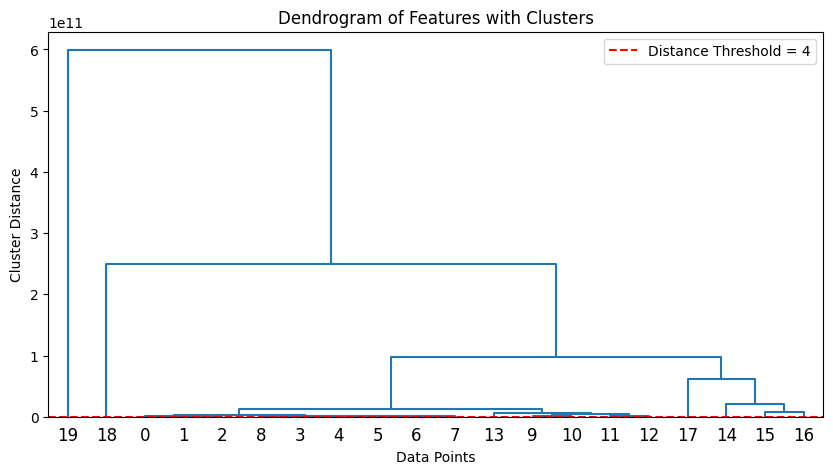

In [68]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import LabelEncoder

linkage_matrix = linkage(subset_data, method='ward', metric='euclidean')

# divide the dendrogram into two clusters with a distance threshold of 4
threshold = 4
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# visualize the dendrogram with clusters
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=df_.index, orientation='top', color_threshold=threshold)
plt.title('Dendrogram of Features with Clusters')
plt.xlabel('Data Points')
plt.ylabel('Cluster Distance')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Distance Threshold = {threshold}')
plt.legend()
plt.show()


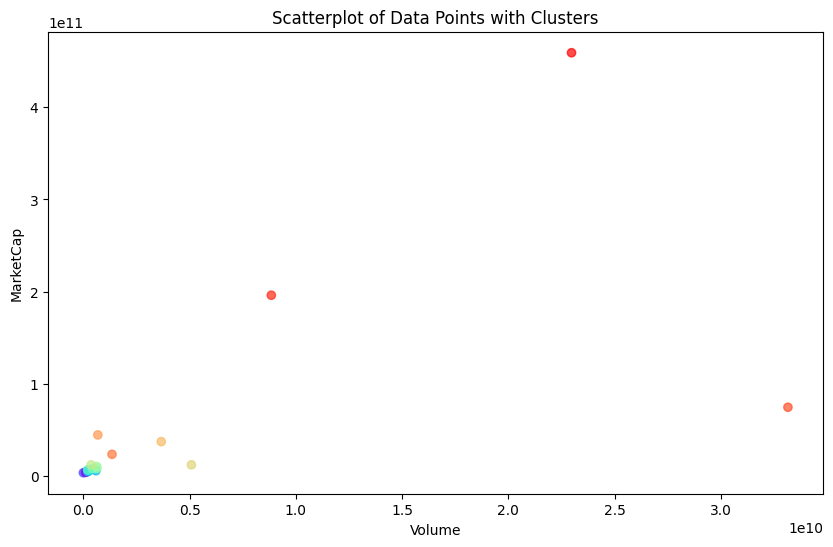

In [69]:
# scatterplot to visualize the data points and clusters
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['Volume'], subset_data['MarketCap'], c=clusters, cmap='rainbow', alpha=0.7)
plt.xlabel('Volume')
plt.ylabel('MarketCap')
plt.title('Scatterplot of Data Points with Clusters')
plt.show()

Analyzing the dataset to find the optimal clustering

In [70]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_.dropna(inplace=True) 

# Encode categorical variables
for feature in categorical_features:
        label_encoder = LabelEncoder()
        df_[feature] = label_encoder.fit_transform(df_[feature])

# Scale numeric features
scaler = StandardScaler()
scaler.fit(df_[numeric_features])
scaled_data = scaler.transform(df_[numeric_features])
df_[numeric_features] = scaled_data
print(df_.describe())
print(df_)


         Symbol        Volume     MarketCap   TotalSupply  ProofType  \
count  20.00000  2.000000e+01  2.000000e+01  2.000000e+01  20.000000   
mean    9.50000 -2.220446e-17 -4.440892e-17  3.191891e-17   1.900000   
std     5.91608  1.025978e+00  1.025978e+00  1.025978e+00   1.252366   
min     0.00000 -4.716457e-01 -4.141199e-01 -2.295858e-01   0.000000   
25%     4.75000 -4.459340e-01 -3.949082e-01 -2.295830e-01   1.000000   
50%     9.50000 -4.118591e-01 -3.697125e-01 -2.295766e-01   1.500000   
75%    14.25000 -2.437807e-01 -1.886798e-01 -2.293662e-01   2.250000   
max    19.00000  3.448978e+00  3.968780e+00  4.358899e+00   4.000000   

         Network  
count  20.000000  
mean    5.100000  
std     2.918183  
min     0.000000  
25%     3.750000  
50%     5.000000  
75%     6.250000  
max    11.000000  
    Symbol    Volume  MarketCap  TotalSupply  ProofType  Network
0        9 -0.471646  -0.414120    -0.229578          1        5
1       15 -0.460130  -0.410214    -0.229578      

K-means clustering

c:\Users\KaraPardazesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KaraPardazesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KaraPardazesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KaraPardazesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

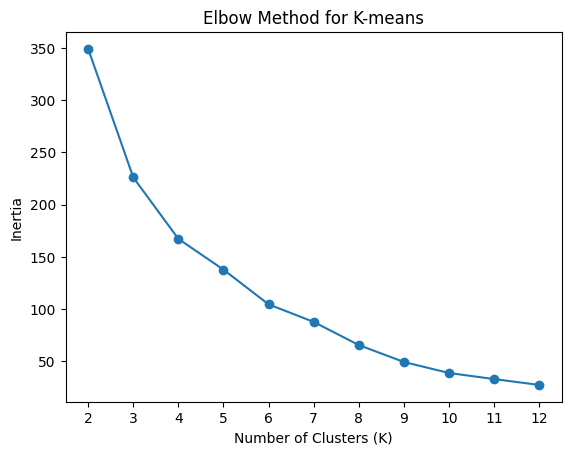

In [71]:
from sklearn.cluster import KMeans
k_values = list(range(2, 13))

inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-means')
plt.xticks(k_values)
plt.show()

c:\Users\KaraPardazesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KaraPardazesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KaraPardazesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KaraPardazesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

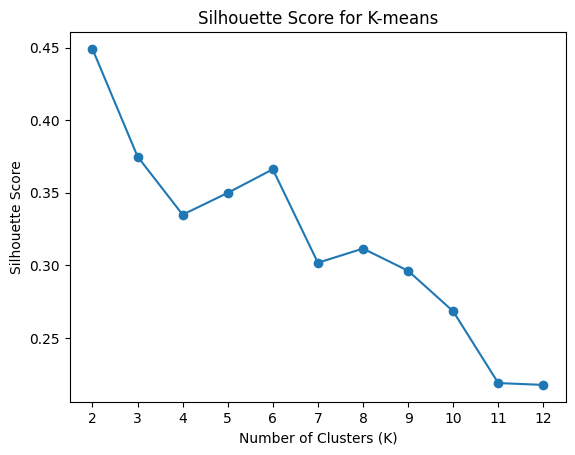

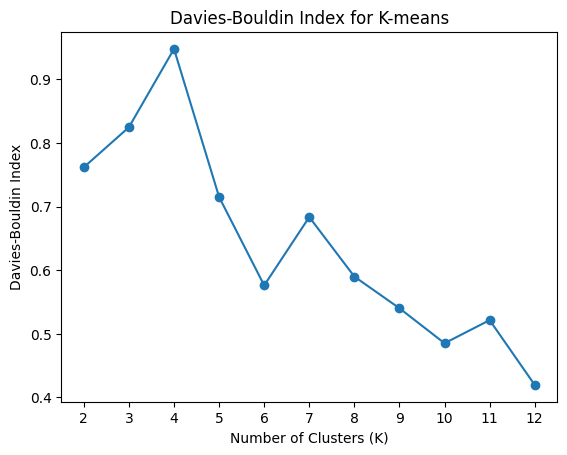

In [78]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_scores = []
dbi_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_)
    labels = kmeans.labels_
    silhouette = silhouette_score(df_, labels)
    dbi = davies_bouldin_score(df_, labels)
    silhouette_scores.append(silhouette)
    dbi_scores.append(dbi)

# plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means')
plt.xticks(k_values)
plt.show()

# plot Davies-Bouldin index
plt.plot(k_values, dbi_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for K-means')
plt.xticks(k_values)
plt.show()


Hierarchial Clustering

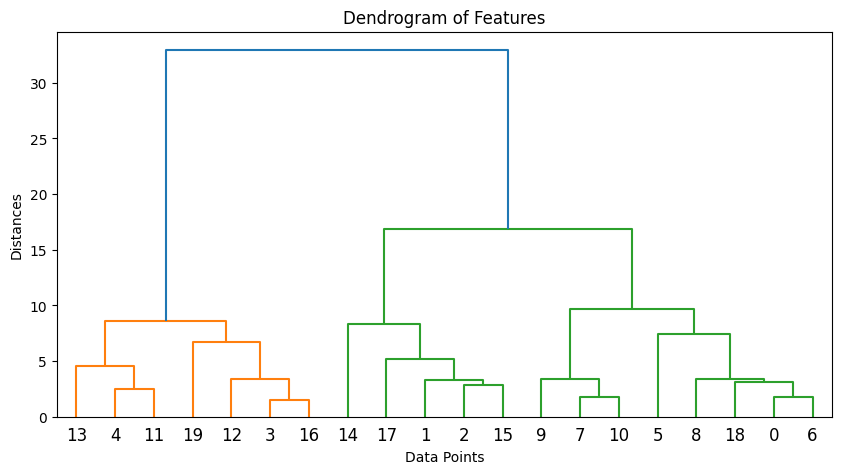

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage

# dendrogram to explore hierarchical clustering
linkage_matrix = linkage(df_, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram of Features')
plt.xlabel('Data Points')
plt.ylabel('Distances')
plt.show()

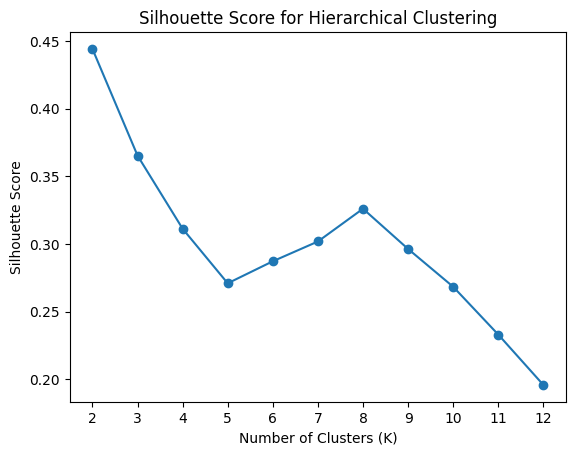

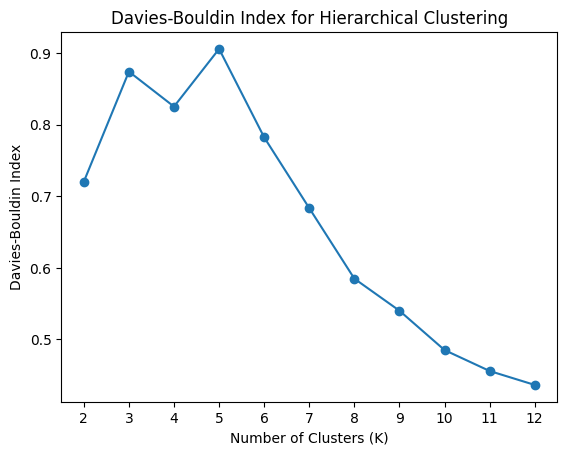

In [79]:
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []
dbi_scores = []

for k in k_values:
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(df_)
    silhouette = silhouette_score(df_, labels)
    dbi = davies_bouldin_score(df_, labels)
    silhouette_scores.append(silhouette)
    dbi_scores.append(dbi)

# plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xticks(k_values)
plt.show()

# plot Davies-Bouldin index
plt.plot(k_values, dbi_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Hierarchical Clustering')
plt.xticks(k_values)
plt.show()


DBSCAN

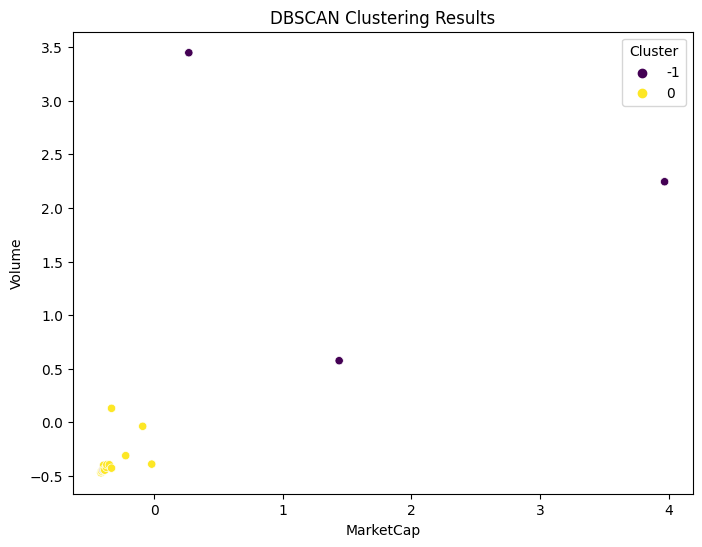

In [77]:
from sklearn.cluster import DBSCAN

X = df_[numeric_features]
eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_['Cluster'] = dbscan.fit_predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_, x='MarketCap', y='Volume', hue='Cluster', palette='viridis', legend='full')
plt.title('DBSCAN Clustering Results')
plt.show()

Best Silhouette Score: 0.720506647060961
Best eps: 0.4
Best min_samples: 2


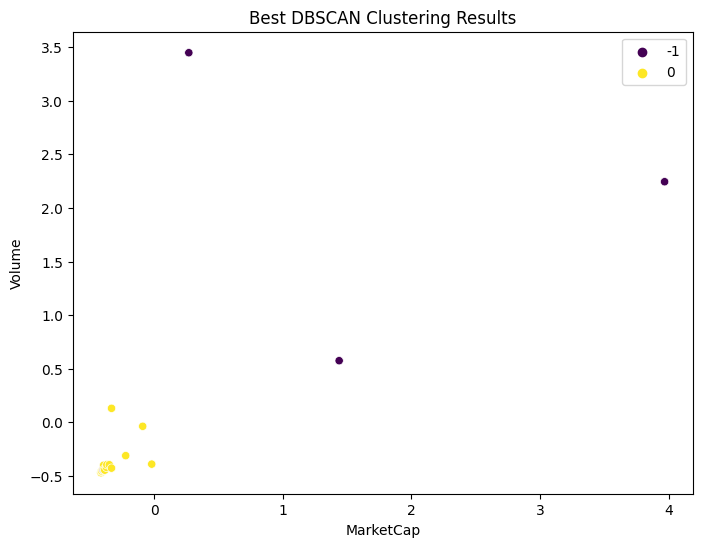

In [81]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# range of epsilon values to try
eps_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# range of min_samples values to try
min_samples_range = [2, 3, 4, 5, 6]

best_silhouette_score = -1
best_eps = 0
best_min_samples = 0
best_labels = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_[numeric_features])
        
        if len(set(labels)) > 1:  # Silhouette score is undefined for a single cluster
            silhouette = silhouette_score(df_[numeric_features], labels)
            
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

# visualize the best clustering result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_, x='MarketCap', y='Volume', hue=best_labels, palette='viridis', legend='full')
plt.title('Best DBSCAN Clustering Results')
plt.show()
